## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 48.9ms	remaining: 48.9s
1:	learn: 0.9301086	total: 50.8ms	remaining: 25.4s
2:	learn: 0.9005637	total: 52.9ms	remaining: 17.6s
3:	learn: 0.8720983	total: 54.9ms	remaining: 13.7s
4:	learn: 0.8467410	total: 56.9ms	remaining: 11.3s
5:	learn: 0.8226672	total: 58.9ms	remaining: 9.76s
6:	learn: 0.7994702	total: 60.7ms	remaining: 8.61s
7:	learn: 0.7784272	total: 62.6ms	remaining: 7.76s
8:	learn: 0.7602192	total: 64.4ms	remaining: 7.09s
9:	learn: 0.7412421	total: 66.3ms	remaining: 6.57s
10:	learn: 0.7247930	total: 68.3ms	remaining: 6.14s
11:	learn: 0.7089951	total: 70.2ms	remaining: 5.78s
12:	learn: 0.6951345	total: 72.1ms	remaining: 5.47s
13:	learn: 0.6809276	total: 74.2ms	remaining: 5.22s
14:	learn: 0.6692630	total: 76ms	remaining: 4.99s
15:	learn: 0.6588323	total: 77.9ms	remaining: 4.79s
16:	learn: 0.6472700	total: 79.6ms	remaining: 4.6s
17:	learn: 0.6379982	total: 81.5ms	remaining: 4.44s
18:	learn: 0.6294674	total: 83.3ms	remaining: 4

62:	learn: 0.4792422	total: 167ms	remaining: 2.48s
63:	learn: 0.4780719	total: 169ms	remaining: 2.47s
64:	learn: 0.4771984	total: 171ms	remaining: 2.45s
65:	learn: 0.4759610	total: 172ms	remaining: 2.44s
66:	learn: 0.4750287	total: 174ms	remaining: 2.43s
67:	learn: 0.4740093	total: 176ms	remaining: 2.41s
68:	learn: 0.4732612	total: 178ms	remaining: 2.4s
69:	learn: 0.4727266	total: 180ms	remaining: 2.39s
70:	learn: 0.4716549	total: 182ms	remaining: 2.38s
71:	learn: 0.4709088	total: 184ms	remaining: 2.37s
72:	learn: 0.4697594	total: 186ms	remaining: 2.36s
73:	learn: 0.4690934	total: 188ms	remaining: 2.35s
74:	learn: 0.4680942	total: 190ms	remaining: 2.34s
75:	learn: 0.4672726	total: 192ms	remaining: 2.33s
76:	learn: 0.4664479	total: 193ms	remaining: 2.32s
77:	learn: 0.4656044	total: 195ms	remaining: 2.31s
78:	learn: 0.4645375	total: 197ms	remaining: 2.3s
79:	learn: 0.4639654	total: 199ms	remaining: 2.29s
80:	learn: 0.4628457	total: 201ms	remaining: 2.28s
81:	learn: 0.4620203	total: 203ms

148:	learn: 0.4262192	total: 332ms	remaining: 1.9s
149:	learn: 0.4257966	total: 334ms	remaining: 1.9s
150:	learn: 0.4253062	total: 336ms	remaining: 1.89s
151:	learn: 0.4247446	total: 338ms	remaining: 1.89s
152:	learn: 0.4237365	total: 340ms	remaining: 1.88s
153:	learn: 0.4233079	total: 342ms	remaining: 1.88s
154:	learn: 0.4228876	total: 344ms	remaining: 1.87s
155:	learn: 0.4225404	total: 346ms	remaining: 1.87s
156:	learn: 0.4222831	total: 348ms	remaining: 1.87s
157:	learn: 0.4218088	total: 350ms	remaining: 1.86s
158:	learn: 0.4213239	total: 352ms	remaining: 1.86s
159:	learn: 0.4210022	total: 354ms	remaining: 1.86s
160:	learn: 0.4201256	total: 356ms	remaining: 1.85s
161:	learn: 0.4197073	total: 358ms	remaining: 1.85s
162:	learn: 0.4192052	total: 359ms	remaining: 1.84s
163:	learn: 0.4187949	total: 361ms	remaining: 1.84s
164:	learn: 0.4184572	total: 363ms	remaining: 1.84s
165:	learn: 0.4180680	total: 365ms	remaining: 1.83s
166:	learn: 0.4176884	total: 367ms	remaining: 1.83s
167:	learn: 0.

230:	learn: 0.3957018	total: 495ms	remaining: 1.65s
231:	learn: 0.3954162	total: 497ms	remaining: 1.65s
232:	learn: 0.3951665	total: 499ms	remaining: 1.64s
233:	learn: 0.3949269	total: 501ms	remaining: 1.64s
234:	learn: 0.3945894	total: 503ms	remaining: 1.64s
235:	learn: 0.3944181	total: 505ms	remaining: 1.63s
236:	learn: 0.3941497	total: 507ms	remaining: 1.63s
237:	learn: 0.3939819	total: 509ms	remaining: 1.63s
238:	learn: 0.3938322	total: 511ms	remaining: 1.63s
239:	learn: 0.3935463	total: 513ms	remaining: 1.62s
240:	learn: 0.3933166	total: 515ms	remaining: 1.62s
241:	learn: 0.3930992	total: 517ms	remaining: 1.62s
242:	learn: 0.3928898	total: 519ms	remaining: 1.62s
243:	learn: 0.3926199	total: 521ms	remaining: 1.61s
244:	learn: 0.3923955	total: 523ms	remaining: 1.61s
245:	learn: 0.3922312	total: 525ms	remaining: 1.61s
246:	learn: 0.3919499	total: 527ms	remaining: 1.61s
247:	learn: 0.3917420	total: 529ms	remaining: 1.6s
248:	learn: 0.3915186	total: 531ms	remaining: 1.6s
249:	learn: 0.

313:	learn: 0.3771184	total: 658ms	remaining: 1.44s
314:	learn: 0.3769370	total: 660ms	remaining: 1.43s
315:	learn: 0.3766643	total: 662ms	remaining: 1.43s
316:	learn: 0.3764891	total: 663ms	remaining: 1.43s
317:	learn: 0.3762751	total: 665ms	remaining: 1.43s
318:	learn: 0.3761284	total: 667ms	remaining: 1.42s
319:	learn: 0.3760168	total: 669ms	remaining: 1.42s
320:	learn: 0.3757763	total: 671ms	remaining: 1.42s
321:	learn: 0.3756076	total: 673ms	remaining: 1.42s
322:	learn: 0.3754123	total: 675ms	remaining: 1.41s
323:	learn: 0.3751852	total: 677ms	remaining: 1.41s
324:	learn: 0.3750004	total: 679ms	remaining: 1.41s
325:	learn: 0.3749086	total: 680ms	remaining: 1.41s
326:	learn: 0.3746654	total: 682ms	remaining: 1.4s
327:	learn: 0.3745405	total: 685ms	remaining: 1.4s
328:	learn: 0.3743710	total: 687ms	remaining: 1.4s
329:	learn: 0.3741679	total: 689ms	remaining: 1.4s
330:	learn: 0.3738646	total: 690ms	remaining: 1.4s
331:	learn: 0.3736647	total: 692ms	remaining: 1.39s
332:	learn: 0.373

396:	learn: 0.3627743	total: 820ms	remaining: 1.25s
397:	learn: 0.3626747	total: 822ms	remaining: 1.24s
398:	learn: 0.3625881	total: 824ms	remaining: 1.24s
399:	learn: 0.3622963	total: 826ms	remaining: 1.24s
400:	learn: 0.3622314	total: 828ms	remaining: 1.24s
401:	learn: 0.3620143	total: 830ms	remaining: 1.23s
402:	learn: 0.3618403	total: 832ms	remaining: 1.23s
403:	learn: 0.3616747	total: 834ms	remaining: 1.23s
404:	learn: 0.3614255	total: 836ms	remaining: 1.23s
405:	learn: 0.3613607	total: 838ms	remaining: 1.23s
406:	learn: 0.3612875	total: 840ms	remaining: 1.22s
407:	learn: 0.3611516	total: 842ms	remaining: 1.22s
408:	learn: 0.3609621	total: 844ms	remaining: 1.22s
409:	learn: 0.3608193	total: 846ms	remaining: 1.22s
410:	learn: 0.3604920	total: 847ms	remaining: 1.21s
411:	learn: 0.3603038	total: 849ms	remaining: 1.21s
412:	learn: 0.3602055	total: 851ms	remaining: 1.21s
413:	learn: 0.3599094	total: 853ms	remaining: 1.21s
414:	learn: 0.3597887	total: 855ms	remaining: 1.21s
415:	learn: 

482:	learn: 0.3501522	total: 984ms	remaining: 1.05s
483:	learn: 0.3500494	total: 986ms	remaining: 1.05s
484:	learn: 0.3498921	total: 988ms	remaining: 1.05s
485:	learn: 0.3497143	total: 990ms	remaining: 1.05s
486:	learn: 0.3496172	total: 992ms	remaining: 1.04s
487:	learn: 0.3494609	total: 994ms	remaining: 1.04s
488:	learn: 0.3493200	total: 996ms	remaining: 1.04s
489:	learn: 0.3491550	total: 998ms	remaining: 1.04s
490:	learn: 0.3490323	total: 1000ms	remaining: 1.04s
491:	learn: 0.3488767	total: 1s	remaining: 1.03s
492:	learn: 0.3487285	total: 1s	remaining: 1.03s
493:	learn: 0.3486318	total: 1.01s	remaining: 1.03s
494:	learn: 0.3485016	total: 1.01s	remaining: 1.03s
495:	learn: 0.3484072	total: 1.01s	remaining: 1.03s
496:	learn: 0.3482698	total: 1.01s	remaining: 1.02s
497:	learn: 0.3481630	total: 1.01s	remaining: 1.02s
498:	learn: 0.3480855	total: 1.02s	remaining: 1.02s
499:	learn: 0.3478655	total: 1.02s	remaining: 1.02s
500:	learn: 0.3477966	total: 1.02s	remaining: 1.02s
501:	learn: 0.347

561:	learn: 0.3402836	total: 1.15s	remaining: 894ms
562:	learn: 0.3402264	total: 1.15s	remaining: 892ms
563:	learn: 0.3400466	total: 1.15s	remaining: 890ms
564:	learn: 0.3399235	total: 1.15s	remaining: 887ms
565:	learn: 0.3398064	total: 1.15s	remaining: 885ms
566:	learn: 0.3396466	total: 1.16s	remaining: 883ms
567:	learn: 0.3395531	total: 1.16s	remaining: 881ms
568:	learn: 0.3394093	total: 1.16s	remaining: 879ms
569:	learn: 0.3393241	total: 1.16s	remaining: 877ms
570:	learn: 0.3392368	total: 1.16s	remaining: 875ms
571:	learn: 0.3391373	total: 1.17s	remaining: 873ms
572:	learn: 0.3390261	total: 1.17s	remaining: 870ms
573:	learn: 0.3389126	total: 1.17s	remaining: 868ms
574:	learn: 0.3388268	total: 1.17s	remaining: 866ms
575:	learn: 0.3387474	total: 1.17s	remaining: 864ms
576:	learn: 0.3386361	total: 1.18s	remaining: 862ms
577:	learn: 0.3385706	total: 1.18s	remaining: 860ms
578:	learn: 0.3384814	total: 1.18s	remaining: 858ms
579:	learn: 0.3383559	total: 1.18s	remaining: 856ms
580:	learn: 

644:	learn: 0.3318169	total: 1.31s	remaining: 722ms
645:	learn: 0.3316585	total: 1.31s	remaining: 720ms
646:	learn: 0.3316256	total: 1.32s	remaining: 718ms
647:	learn: 0.3315220	total: 1.32s	remaining: 716ms
648:	learn: 0.3313829	total: 1.32s	remaining: 714ms
649:	learn: 0.3313125	total: 1.32s	remaining: 712ms
650:	learn: 0.3311735	total: 1.32s	remaining: 710ms
651:	learn: 0.3310386	total: 1.32s	remaining: 708ms
652:	learn: 0.3309129	total: 1.33s	remaining: 706ms
653:	learn: 0.3308321	total: 1.33s	remaining: 704ms
654:	learn: 0.3307342	total: 1.33s	remaining: 702ms
655:	learn: 0.3306809	total: 1.33s	remaining: 700ms
656:	learn: 0.3305729	total: 1.34s	remaining: 698ms
657:	learn: 0.3304900	total: 1.34s	remaining: 695ms
658:	learn: 0.3303842	total: 1.34s	remaining: 693ms
659:	learn: 0.3302235	total: 1.34s	remaining: 691ms
660:	learn: 0.3300983	total: 1.34s	remaining: 689ms
661:	learn: 0.3299994	total: 1.34s	remaining: 687ms
662:	learn: 0.3299184	total: 1.35s	remaining: 685ms
663:	learn: 

730:	learn: 0.3237918	total: 1.48s	remaining: 544ms
731:	learn: 0.3236654	total: 1.48s	remaining: 542ms
732:	learn: 0.3235938	total: 1.48s	remaining: 540ms
733:	learn: 0.3235120	total: 1.48s	remaining: 538ms
734:	learn: 0.3234421	total: 1.49s	remaining: 535ms
735:	learn: 0.3233367	total: 1.49s	remaining: 533ms
736:	learn: 0.3232438	total: 1.49s	remaining: 531ms
737:	learn: 0.3231289	total: 1.49s	remaining: 529ms
738:	learn: 0.3230697	total: 1.49s	remaining: 527ms
739:	learn: 0.3229734	total: 1.49s	remaining: 525ms
740:	learn: 0.3228697	total: 1.5s	remaining: 523ms
741:	learn: 0.3227984	total: 1.5s	remaining: 521ms
742:	learn: 0.3226895	total: 1.5s	remaining: 519ms
743:	learn: 0.3225924	total: 1.5s	remaining: 517ms
744:	learn: 0.3225096	total: 1.5s	remaining: 515ms
745:	learn: 0.3224088	total: 1.51s	remaining: 513ms
746:	learn: 0.3223202	total: 1.51s	remaining: 511ms
747:	learn: 0.3222404	total: 1.51s	remaining: 509ms
748:	learn: 0.3221810	total: 1.51s	remaining: 507ms
749:	learn: 0.322

815:	learn: 0.3164087	total: 1.64s	remaining: 370ms
816:	learn: 0.3163590	total: 1.64s	remaining: 368ms
817:	learn: 0.3162644	total: 1.65s	remaining: 366ms
818:	learn: 0.3161739	total: 1.65s	remaining: 364ms
819:	learn: 0.3160986	total: 1.65s	remaining: 362ms
820:	learn: 0.3159951	total: 1.65s	remaining: 360ms
821:	learn: 0.3159403	total: 1.65s	remaining: 358ms
822:	learn: 0.3158160	total: 1.66s	remaining: 356ms
823:	learn: 0.3157523	total: 1.66s	remaining: 354ms
824:	learn: 0.3156673	total: 1.66s	remaining: 352ms
825:	learn: 0.3156288	total: 1.66s	remaining: 350ms
826:	learn: 0.3155257	total: 1.66s	remaining: 348ms
827:	learn: 0.3154546	total: 1.67s	remaining: 346ms
828:	learn: 0.3153664	total: 1.67s	remaining: 344ms
829:	learn: 0.3152896	total: 1.67s	remaining: 342ms
830:	learn: 0.3152050	total: 1.67s	remaining: 340ms
831:	learn: 0.3151385	total: 1.67s	remaining: 338ms
832:	learn: 0.3150922	total: 1.68s	remaining: 336ms
833:	learn: 0.3149588	total: 1.68s	remaining: 334ms
834:	learn: 

899:	learn: 0.3100512	total: 1.81s	remaining: 201ms
900:	learn: 0.3100138	total: 1.81s	remaining: 199ms
901:	learn: 0.3099635	total: 1.81s	remaining: 197ms
902:	learn: 0.3098989	total: 1.81s	remaining: 195ms
903:	learn: 0.3098084	total: 1.82s	remaining: 193ms
904:	learn: 0.3097402	total: 1.82s	remaining: 191ms
905:	learn: 0.3096378	total: 1.82s	remaining: 189ms
906:	learn: 0.3095878	total: 1.82s	remaining: 187ms
907:	learn: 0.3095154	total: 1.82s	remaining: 185ms
908:	learn: 0.3094688	total: 1.82s	remaining: 183ms
909:	learn: 0.3093784	total: 1.83s	remaining: 181ms
910:	learn: 0.3093058	total: 1.83s	remaining: 179ms
911:	learn: 0.3092574	total: 1.83s	remaining: 177ms
912:	learn: 0.3092023	total: 1.83s	remaining: 175ms
913:	learn: 0.3091306	total: 1.83s	remaining: 173ms
914:	learn: 0.3090719	total: 1.84s	remaining: 171ms
915:	learn: 0.3090199	total: 1.84s	remaining: 169ms
916:	learn: 0.3089417	total: 1.84s	remaining: 167ms
917:	learn: 0.3088562	total: 1.84s	remaining: 165ms
918:	learn: 

983:	learn: 0.3040665	total: 1.97s	remaining: 32.1ms
984:	learn: 0.3040237	total: 1.98s	remaining: 30.1ms
985:	learn: 0.3039532	total: 1.98s	remaining: 28.1ms
986:	learn: 0.3038723	total: 1.98s	remaining: 26.1ms
987:	learn: 0.3038141	total: 1.98s	remaining: 24.1ms
988:	learn: 0.3037455	total: 1.98s	remaining: 22.1ms
989:	learn: 0.3036820	total: 1.99s	remaining: 20.1ms
990:	learn: 0.3036165	total: 1.99s	remaining: 18.1ms
991:	learn: 0.3035759	total: 1.99s	remaining: 16ms
992:	learn: 0.3035124	total: 1.99s	remaining: 14ms
993:	learn: 0.3034295	total: 1.99s	remaining: 12ms
994:	learn: 0.3033612	total: 2s	remaining: 10ms
995:	learn: 0.3033209	total: 2s	remaining: 8.02ms
996:	learn: 0.3032659	total: 2s	remaining: 6.01ms
997:	learn: 0.3032189	total: 2s	remaining: 4.01ms
998:	learn: 0.3031594	total: 2s	remaining: 2ms
999:	learn: 0.3030916	total: 2s	remaining: 0us


# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.4484121533281006


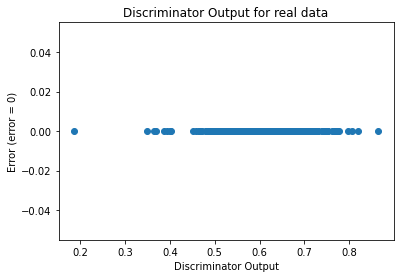

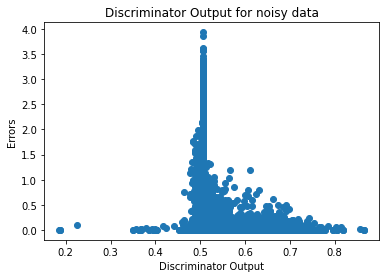

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3870]], device='cuda:0', requires_grad=True)
